## Transfer Learning Inception V3 using Keras

Please download the dataset from the below url

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.2
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/client/session.py:1768: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.resnet152V2 import ResNet152V2
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/DATA/train'
valid_path = '/content/drive/MyDrive/DATA/test'


In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
import tensorflow
resnet152V2 =tensorflow.keras.applications.ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [ ]:
# don't train existing weights
for layer in resnet152V2.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/DATA/train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(resnet152V2.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet152V2.input, outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/DATA/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/DATA/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 24 images belonging to 4 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
61/61 [==============================] - 490s 8s/step - loss: 1.6292 - accuracy: 0.7981 - val_loss: 0.2512 - val_accuracy: 0.9583
Epoch 2/20
61/61 [==============================] - 51s 830ms/step - loss: 0.4154 - accuracy: 0.9375 - val_loss: 0.1347 - val_accuracy: 0.9167
Epoch 3/20
61/61 [==============================] - 51s 834ms/step - loss: 0.4260 - accuracy: 0.9405 - val_loss: 1.4206 - val_accuracy: 0.8750
Epoch 4/20
61/61 [==============================] - 51s 834ms/step - loss: 0.3103 - accuracy: 0.9503 - val_loss: 0.1340 - val_accuracy: 0.9583
Epoch 5/20
61/61 [==============================] - 51s 834ms/step - loss: 0.2302 - accuracy: 0.9646 - val_loss: 0.0742 - val_accuracy: 0.9583
Epoch 6/20
61/61 [==============================] - 51s 831ms/step - loss: 0.2994 - accuracy: 0.9631 - val_loss: 0.2137 - val_accuracy: 0.9583
Epoch 7/20
61/61 [==============================] - 51s 827ms/step - loss: 0.3188 - accuracy: 0.9600 - val_loss: 2.5214e-04 - val_accuracy: 1.00

In [ ]:
import matplotlib.pyplot as plt

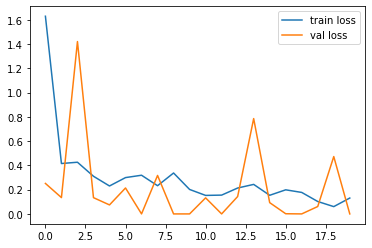

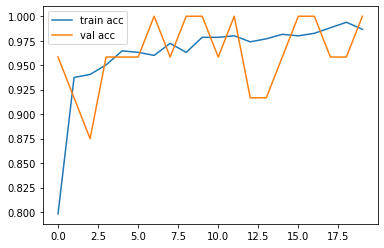

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet152V2.h5')

In [ ]:

y_pred = model.predict(test_set)


In [ ]:
y_pred

array([[6.87566546e-18, 1.84827673e-08, 9.35423521e-36, 1.00000000e+00],
       [1.48770350e-05, 3.86159078e-36, 9.99985099e-01, 7.02860412e-18],
       [0.00000000e+00, 1.37681084e-32, 0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.12904395e-31, 1.95448238e-20, 3.77631758e-25],
       [7.55617446e-16, 5.86498213e-33, 1.19788073e-29, 1.00000000e+00],
       [1.02081788e-13, 1.92177908e-23, 6.76315773e-18, 1.00000000e+00],
       [6.95495701e-12, 3.47241891e-20, 1.00000000e+00, 2.48873188e-12],
       [1.22105214e-26, 0.00000000e+00, 1.00000000e+00, 3.21788507e-37],
       [7.31204886e-25, 0.00000000e+00, 1.00000000e+00, 4.02697083e-27],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.08106414e-23, 1.00000000e+00, 2.53566148e-22, 3.42956691e-10],
       [1.23947535e-19, 9.99999046e-01, 9.07853441e-22, 9.08242384e-07],
       [1.74687732e-32, 8.63550109e-34, 9.11536022e-30, 1.00000000e+00],
       [1.00000000e+00, 3.12904395e-31, 1.95448238e

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([3, 2, 3, 0, 3, 3, 2, 2, 2, 1, 1, 1, 3, 0, 0, 1, 2, 3, 1, 0, 1, 2,
       3, 0])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_resnet152V2.h5')

In [ ]:
img_data

NameError: ignored

In [ ]:
img=image.load_img('Datasets/Test/Coffee/download (2).jpg',target_size=(224,224))



In [ ]:
x=image.img_to_array(img)
x

In [ ]:
x.shape

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

In [ ]:
model.predict(img_data)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a==1

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__